**Idée de problématique** : on propose un essai sur deux hotels :

on va leur développer un modèle qui prédit si le client qui effectue une réservation est susceptible de faire une annulation.
Le but de cet outil est de proposer à l'hotel "d'adapter ses tarifs" .

en gros si le client est susceptible de faire une annulation, on va lui imposer le tarif "non remboursable / partiellement remboursable".

et si le client est susceptible de ne pas faire d'annulation, on va lui proposer le tarif "remboursable". comme ça l'hotel fera moins de perte car les anulations de dernière minute sont très loudrdes financièrement. 

colonne dposit contient si c'est remboursable ou pas 

hotel: The type of hotel, either "City Hotel" or "Resort Hotel.", resort = vacances

is_canceled: Binary value indicating whether the booking was cancelled (1) or not (0).

lead_time: Number of days between booking and arrival.

arrival_date_year: Year of arrival date.

arrival_date_month: Month of arrival date.

arrival_date_week_number: Week number of arrival date.

arrival_date_day_of_month: Day of the month of arrival date.

stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stays.

stays_in_week_nights: Number of weekday nights (Monday to Friday) the guest stays.

adults: Number of adults.

children: Number of children.

babies: Number of babies.

meal: Type of meal booked.

country: Country of origin.

market_segment: Market segment designation.

distribution_channel: Booking distribution channel.

is_repeated_guest: Binary value indicating whether the guest is a repeated guest (1) or not (0).

previous_cancellations: Number of previous booking cancellations.

previous_bookings_not_canceled: Number of previous bookings not cancelled.

reserved_room_type: Code of room type reserved.

assigned_room_type: Code of room type assigned at check-in.

booking_changes: Number of changes/amendments made to the booking.

deposit_type: Type of deposit made.

agent: ID of the travel agency.

company: ID of the company.

days_in_waiting_list: Number of days in the waiting list before booking.

customer_type: Type of booking.

adr: Average daily rate. combien gagne l'hotel, pour la journée donnée, par chambre

required_car_parking_spaces: Number of car parking spaces required.

total_of_special_requests: Number of special requests made.

reservation_status: Reservation last status.

reservation_status_date: Date of the last status.

name: Guest's name. (Not Real)

email: Guest's email address.(Not Real)

phone-number: Guest's phone number. (Not Real)

credit_card: Guest's credit card details. (Not Real)

In [41]:
import pandas as pd
import numpy as np 
import matplotlib as plt
from fct import *

In [42]:
df = pd.read_csv("../hotel_bookings.csv", sep=",")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Cleaning

### NaN and select columns

In [43]:
colonne_a_garder = ["hotel", "is_canceled", "lead_time", "arrival_date_year", "arrival_date_month", "arrival_date_day_of_month", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", "meal", "country", "market_segment", "is_repeated_guest", "previous_cancellations", "previous_bookings_not_canceled", "reserved_room_type", "assigned_room_type", "booking_changes", "deposit_type", "days_in_waiting_list", "customer_type", "adr", "required_car_parking_spaces", "total_of_special_requests"]
df = df[colonne_a_garder]
df.dropna(inplace=True)
df.drop_duplicates(subset=colonne_a_garder, inplace=True)
print(df.isnull().sum())




hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64


/var/folders/1q/ds13mxv91mgf0b9tt_mwyb4r0000gn/T/ipykernel_3930/4157271603.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1q/ds13mxv91mgf0b9tt_mwyb4r0000gn/T/ipykernel_3930/4157271603.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## type of columns (date, ...)

In [44]:
df['arrival_date_month'] = pd.to_datetime(df.arrival_date_month, format='%B', errors='coerce').dt.month
df['arrival_date'] = pd.to_datetime(df[['arrival_date_year','arrival_date_month','arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1))
df.drop(['arrival_date_year','arrival_date_month','arrival_date_day_of_month'], axis=1, inplace=True)
print(df)

/var/folders/1q/ds13mxv91mgf0b9tt_mwyb4r0000gn/T/ipykernel_3930/2894240059.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



               hotel  is_canceled  lead_time  stays_in_weekend_nights  \
0       Resort Hotel            0        342                        0   
1       Resort Hotel            0        737                        0   
2       Resort Hotel            0          7                        0   
3       Resort Hotel            0         13                        0   
4       Resort Hotel            0         14                        0   
...              ...          ...        ...                      ...   
119385    City Hotel            0         23                        2   
119386    City Hotel            0        102                        2   
119387    City Hotel            0         34                        2   
119388    City Hotel            0        109                        2   
119389    City Hotel            0        205                        2   

        stays_in_week_nights  adults  children  babies meal country  ...  \
0                          0       2       0.0 

/var/folders/1q/ds13mxv91mgf0b9tt_mwyb4r0000gn/T/ipykernel_3930/2894240059.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1q/ds13mxv91mgf0b9tt_mwyb4r0000gn/T/ipykernel_3930/2894240059.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## nettoyage données valeurs aberrantes (var quanti), modalité seule (var quali)

In [45]:
columns_to_filter_quanti = ["lead_time", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies", "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", "days_in_waiting_list", "adr", "required_car_parking_spaces"]
columns_to_filter_quali = ["reserved_room_type", "assigned_room_type"]

# Filter variables quanti
for column in columns_to_filter_quanti:
    df = filter_occurence_variable(df, column, 10)

# Filter variables quali
for column in columns_to_filter_quali:
    df = filter_occurence_variable(df, column, 10)

df = df[df['meal'] != "Undefined"]

## binary to categorielle

In [46]:
# columns_binary = ["is_canceled", "is_repeated_guest"]

# for column in columns_binary:
#     df[column] = df[column].astype('category')

# print(df["is_canceled"].info())

## Encodage One-hot pour algo machine learning

In [47]:
col_quali = ["hotel", "meal", "market_segment", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type"]
df_encoded = pd.get_dummies(df, columns=col_quali, dtype=int)
df_encoded.drop(['country', "arrival_date"], axis=1, inplace=True)
for col in df_encoded.columns:
    if df_encoded[col].dtype != "float64":
        df_encoded[col] = df_encoded[col].astype('int64')

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68439 entries, 0 to 119389
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     68439 non-null  int64  
 1   lead_time                       68439 non-null  int64  
 2   stays_in_weekend_nights         68439 non-null  int64  
 3   stays_in_week_nights            68439 non-null  int64  
 4   adults                          68439 non-null  int64  
 5   children                        68439 non-null  float64
 6   babies                          68439 non-null  int64  
 7   is_repeated_guest               68439 non-null  int64  
 8   previous_cancellations          68439 non-null  int64  
 9   previous_bookings_not_canceled  68439 non-null  int64  
 10  booking_changes                 68439 non-null  int64  
 11  days_in_waiting_list            68439 non-null  int64  
 12  adr                            

## Standardiser les variables quantitatives

In [48]:
# df = standardisation(df)
# df_encoded = standardisation(df_encoded)

**Analsye exploratoire des données**

In [49]:
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,C,C,3,No Deposit,0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,A,C,0,No Deposit,0,Transient,75.0,0,0,2015-07-01
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,A,A,0,No Deposit,0,Transient,75.0,0,0,2015-07-01
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,A,A,0,No Deposit,0,Transient,98.0,0,1,2015-07-01
6,Resort Hotel,0,0,0,2,2,0.0,0,BB,PRT,...,C,C,0,No Deposit,0,Transient,107.0,0,0,2015-07-01


<Axes: xlabel='hotel', ylabel='count'>

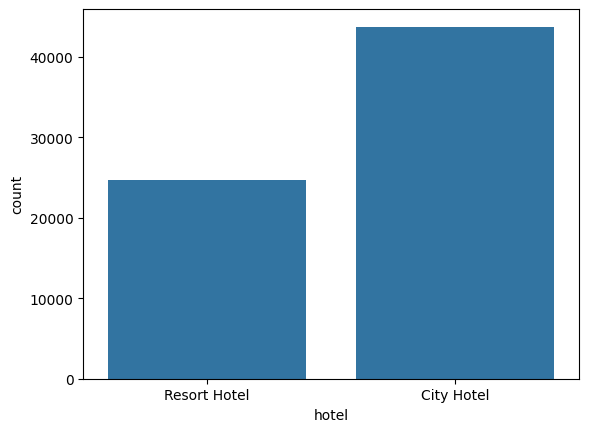

In [50]:
#barplot hotel type distribution avec les barres de couleurs diffrentes:
import seaborn as sns
sns.countplot(x='hotel', data=df)


In [51]:
#afficher les prix en fonction du type d'hotel et du temps
import plotly.express as px
import pandas as pd


# crée le prix moyen par mois par hotel
df['month'] = df['arrival_date'].dt.strftime('%m')
df['month'] = df['month'].astype(int)
final_prices = df.groupby(['month', 'hotel'])['adr'].mean().reset_index()
final_prices.to_csv('final_prices.csv')
# fais la courbe
fig = px.line(final_prices, x = 'month', y = 'adr', color = 'hotel',
            title = 'Prix ​​de la chambre par nuit au cours des mois')
fig.show()





In [52]:
#graphique et plot pour naalyser les données et les modalités:
#nombre d'annulations pour chaque hotel pour chaque mois
# crée le prix moyen par mois par hotel
df['month'] = df['arrival_date'].dt.strftime('%m')
df['month'] = df['month'].astype(int)
final_canceled = df.groupby(['month', 'hotel'])['is_canceled'].sum().reset_index()
final_canceled
# fais la courbe
fig = px.line(final_canceled, x = 'month', y = 'is_canceled', color = 'hotel',
            title = 'Nombre d"annulation')
fig.show()

In [53]:
#nombre de réservations par mois
df['nb_people'] = df['adults']+df['children']+df['babies']
nb_people = df.groupby(['month', 'hotel'])['nb_people'].sum().reset_index()
nb_people
# fais la courbe
fig = px.line(nb_people, x = 'month', y = 'nb_people', color = 'hotel',
            title = 'Nombre de réservations par mois')
fig.show()

In [54]:
#je voudrais pouvoir faire un bar plot avec le nombre d'annulation par rapport au nombre de réservation. pour chaque mois pour chaque hotel

df['arrival_date_month'] = df['arrival_date'].dt.strftime('%m')
df['arrival_date_month'] = df['month'].astype(int)

import plotly.express as px

# Grouper par 'arrival_date_month' et 'hotel', puis calculer le nombre total de réservations et le nombre d'annulations
df_grouped = df.groupby(['arrival_date_month', 'hotel']).agg(total_reservations=('is_canceled', 'count'), cancellations=('is_canceled', 'sum')).reset_index()

# Créer une nouvelle colonne 'cancellation_rate' qui est le ratio du nombre d'annulations sur le nombre total de réservations
df_grouped['cancellation_rate'] = df_grouped['cancellations'] / df_grouped['total_reservations']

# Créer un graphique à barres avec 'arrival_date_month' sur l'axe des x, 'cancellation_rate' sur l'axe des y, et les barres colorées en fonction du type d'hôtel
fig = px.bar(df_grouped, x='arrival_date_month', y='cancellation_rate', color='hotel', barmode='group', title='Taux d\'annulation par mois pour chaque hôtel')
fig.show()
fig = px.line(df_grouped, x='arrival_date_month', y='cancellation_rate', color='hotel',  title='Taux d\'annulation par mois pour chaque hôtel')
fig.show()
df_grouped.to_csv('cancel_rate.csv')

**Corrélation entre les variables et la variable cible : is_canceled**

In [64]:
import pandas as pd
from scipy.stats import chi2_contingency



# Tableau de contingence
# contingency_table = pd.crosstab(df['is_canceled'].astype("str"), df['reserved_room_type'])
# Je veux faire le test du chi 2 pour toutes les variables catégorielles, c'est à dire celles de type str
import pandas as pd
from scipy.stats import chi2_contingency
df_cat = df.select_dtypes(include='object')
for col in df_cat.columns:
    # Créer un tableau de contingence
    contingency_table = pd.crosstab(df[col], df['is_canceled'])

    # Effectuer le test du chi-deux
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Afficher les résultats
    print('Variable :', col)
    print('Chi-deux :', chi2)
    print('p-valeur :', p)
    print('Degrés de liberté :', dof)
    # print('Tableau de contingence attendu :')
    # print(expected)
    print('\n')


contingency_table = pd.crosstab(df['is_canceled'], df['reserved_room_type'])

# Test du Chi-carré
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}, p-value: {p}")


#calcul du V de cramer

# Create a contingency table
contingency_table = pd.crosstab(df['is_canceled'], df['arrival_date_month'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print('Expected contingency table:')
print(expected)
#chi 2 entre is_cancelled et date_reservation
contingency_table = pd.crosstab(df['is_canceled'], df['arrival_date_month'])
contingency_table



Variable : hotel
Chi-deux : 262.1520397700931
p-valeur : 5.82680055451963e-59
Degrés de liberté : 1


Variable : meal
Chi-deux : 350.47962238765564
p-valeur : 1.1744169738906695e-75
Degrés de liberté : 3


Variable : country
Chi-deux : 1800.7858624610103
p-valeur : 4.557295164583518e-270
Degrés de liberté : 170


Variable : market_segment
Chi-deux : 3969.1583897782566
p-valeur : 0.0
Degrés de liberté : 6


Variable : reserved_room_type
Chi-deux : 267.49857520430515
p-valeur : 5.1964574690389783e-54
Degrés de liberté : 7


Variable : assigned_room_type
Chi-deux : 635.5653148514582
p-valeur : 4.845642183484031e-131
Degrés de liberté : 9


Variable : deposit_type
Chi-deux : 1502.9700761778367
p-valeur : 0.0
Degrés de liberté : 2


Variable : customer_type
Chi-deux : 1240.4368790103354
p-valeur : 1.234898423775889e-268
Degrés de liberté : 3


Chi2 Statistic: 267.49857520430515, p-value: 5.1964574690389783e-54
Chi-square statistic: 628.8533690803674
p-value: 9.3852678210449e-128
Degrees of 

arrival_date_month,1,2,3,4,5,6,7,8,9,10,11,12
is_canceled,,,,,,,,,,,,
0,2985,3861,4644,4412,4873,4287,5043,5457,3846,4101,3199,2726
1,823,1204,1458,1982,2006,1943,2535,2685,1249,1266,862,992


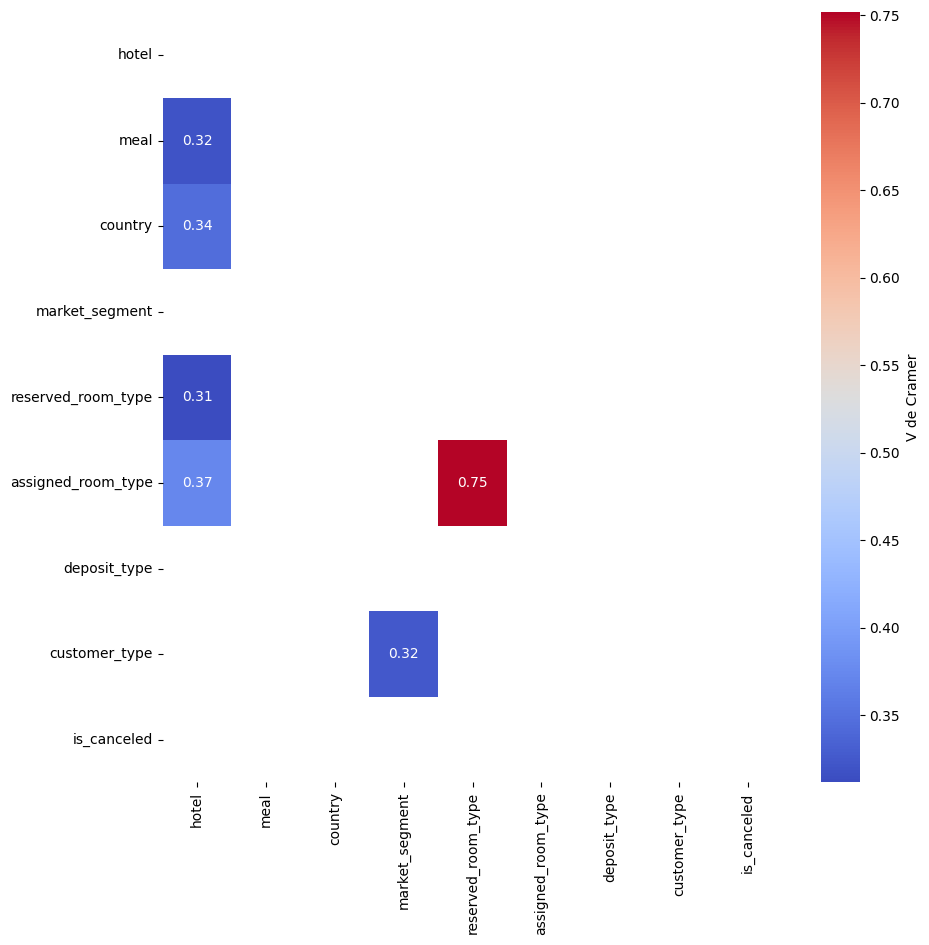

,Variable 1,Variable 2,V de Cramer
4,assigned_room_type,reserved_room_type,0.751754
3,assigned_room_type,hotel,0.372616
1,country,hotel,0.344330
5,customer_type,market_segment,0.324753
0,meal,hotel,0.319908
2,reserved_room_type,hotel,0.311625


In [140]:
#v de cramer entre toutes les combinaisons de variables qualitatives 

from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
#calcule le v de cramer pour toutes les combinaisons de variables qualitatives et rajoute la variable is_cancelled

df_cat = df.select_dtypes(include='object')
df_cat['is_canceled'] = df['is_canceled']
cramer_v = pd.DataFrame({col1: [cramers_v(df[col1], df[col2]) for col2 in df_cat.columns] for col1 in df_cat.columns}, index = df_cat.columns)

#filtrer pour afficher seulement les valeurs >0.3 dans la heatmap
cramer_v = cramer_v[(cramer_v > 0.25) & (cramer_v < 1)]
# cramer_v

#afficher suelement la moitié inférieure de la heatmap
mask = np.triu(np.ones_like(cramer_v, dtype=bool))
cramer_v = cramer_v.mask(mask)


#fais une heatmap pour les résultats
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cramer_v, annot=True, cmap="coolwarm", cbar_kws={'label': 'V de Cramer'})
plt.show()


#montre les résultats sous la forme de dataframe avec 3 colonnes : variable 1, variable 2, v de cramer

cramer_v = cramer_v.stack().reset_index()
cramer_v.columns = ['Variable 1', 'Variable 2', 'V de Cramer']
#tri par ordre décroissant de V de cramer
cramer_v.sort_values(by='V de Cramer', ascending=False, inplace=True)
#supprime les lignes où la variable 1 est égale à la variable 2
cramer_v = cramer_v[cramer_v['Variable 1'] != cramer_v['Variable 2']]
#supprime les lignes en double
cramer_v = cramer_v.drop_duplicates(subset='V de Cramer', keep='first')

cramer_v


**Corrélation de Spearman**

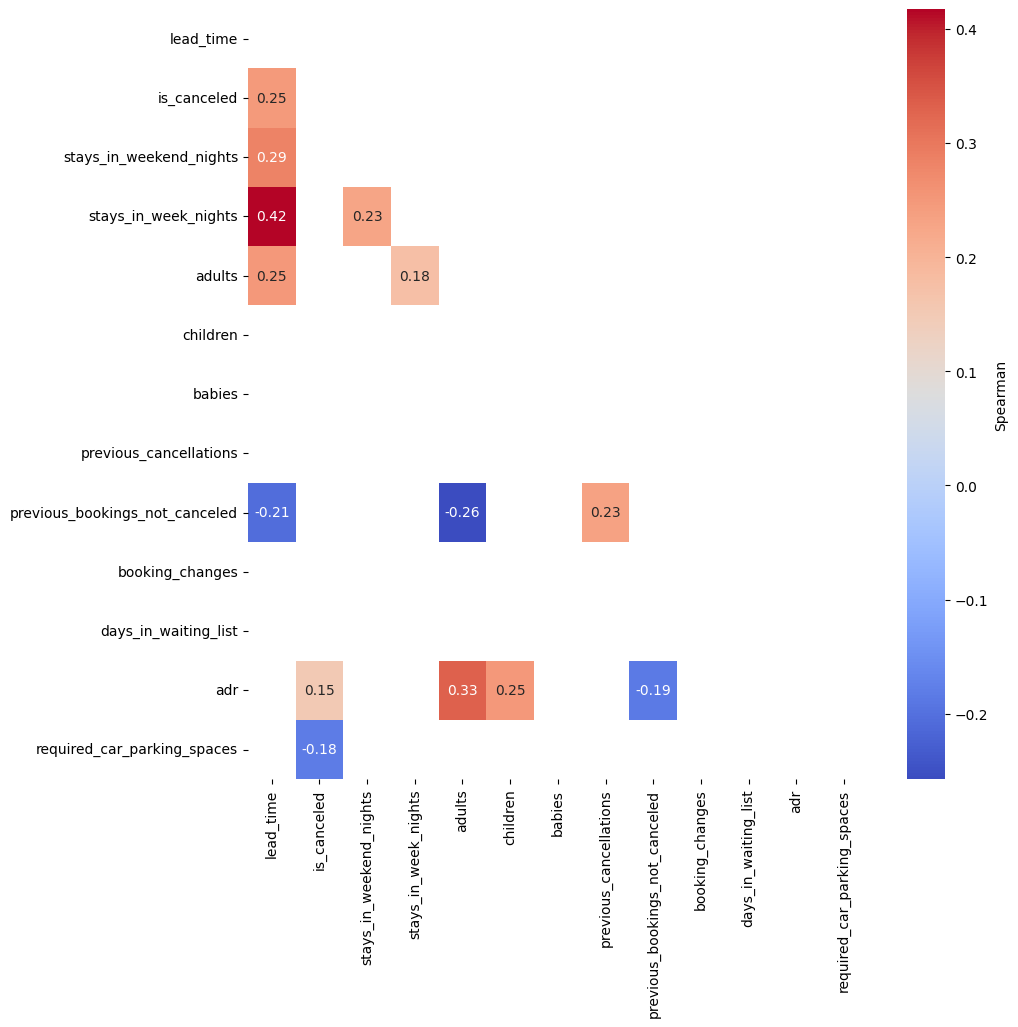

,Variable 1,Variable 2,Spearman
2,stays_in_week_nights,lead_time,0.417362
10,adr,adults,0.331595
1,stays_in_weekend_nights,lead_time,0.285478
4,adults,lead_time,0.250861
11,adr,children,0.250834
0,is_canceled,lead_time,0.247608
8,previous_bookings_not_canceled,previous_cancellations,0.233423
3,stays_in_week_nights,stays_in_weekend_nights,0.228193
5,adults,stays_in_week_nights,0.175471
9,adr,is_canceled,0.151164


In [149]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from scipy.stats import spearmanr

# Select the quantitative variables
quantitative_vars = ['lead_time', 'is_canceled', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces']

# Calculate the Spearman correlation matrix
correlation_matrix = df[quantitative_vars].corr(method='spearman')

# Print the correlation matrix
correlation_matrix

correlation_matrix = correlation_matrix[(correlation_matrix > 0.15) | (correlation_matrix < -0.15)]

#afficher suelement la moitié inférieure de la heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix = correlation_matrix.mask(mask)
#fais une heatmap pour les résultats
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar_kws={'label': 'Spearman'})
plt.show()

#Corrélation de Spearman
#montre les résultats sous la forme de dataframe avec 3 colonnes : variable 1, variable 2, Spearman
correlation_matrix = correlation_matrix.stack().reset_index()
correlation_matrix.columns = ['Variable 1', 'Variable 2', 'Spearman']
#tri par ordre décroissant de Spearman
correlation_matrix.sort_values(by='Spearman', ascending=False, inplace=True)
#supprime les lignes où la variable 1 est égale à la variable 2
correlation_matrix = correlation_matrix[correlation_matrix['Variable 1'] != correlation_matrix['Variable 2']]
#supprime les lignes en double
correlation_matrix = correlation_matrix.drop_duplicates(subset='Spearman', keep='first')
correlation_matrix
#affiche tout le dataframe




In [121]:
from statsmodels.formula.api import ols

import statsmodels.api as sm
# Create the ANOVA model
model = ols('is_canceled ~ lead_time + stays_in_weekend_nights + stays_in_week_nights + adults + children + babies + previous_cancellations + previous_bookings_not_canceled + booking_changes + days_in_waiting_list + adr + required_car_parking_spaces', data=df).fit()

# Perform the ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
lead_time,308.936668,1.0,1719.593909,0.000000e+00
stays_in_weekend_nights,0.107203,1.0,0.596708,4.398395e-01
stays_in_week_nights,9.512617,1.0,52.948838,3.460060e-13
adults,4.659137,1.0,25.933546,3.543098e-07
children,9.865547,1.0,54.913309,1.274105e-13
babies,1.256876,1.0,6.995985,8.171138e-03
previous_cancellations,86.142057,1.0,479.481303,6.415398e-106
previous_bookings_not_canceled,32.459895,1.0,180.677284,3.888848e-41
booking_changes,130.220060,1.0,724.826950,8.074700e-159
days_in_waiting_list,3.757095,1.0,20.912630,4.815554e-06


## Régression logistique

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['is_canceled'], axis=1)
y = df_encoded['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


/Users/augustinhannebert/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.80      0.93      0.86      9892
           1       0.69      0.41      0.51      3796

    accuracy                           0.78     13688
   macro avg       0.75      0.67      0.69     13688
weighted avg       0.77      0.78      0.77     13688



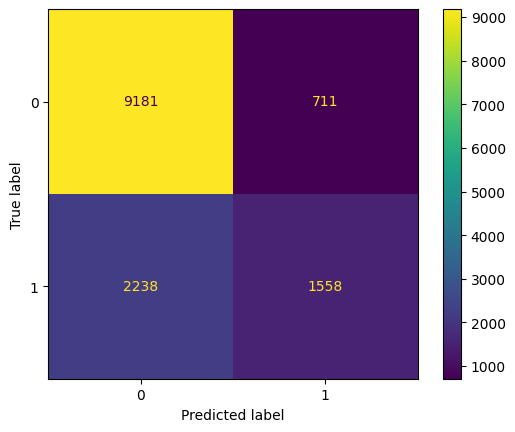

In [123]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
confusion_matrix = ConfusionMatrixDisplay(cm, display_labels=logreg.classes_).plot()
print(classification_report(y_test, y_pred))


In [124]:
#heatmap des spearman et des V de cramer
#il faut d'abord normaliser les coefficicants de sperman, et les V de cramer
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
correlation_matrix['Spearman'] = scaler.fit_transform(correlation_matrix['Spearman'].values.reshape(-1, 1))
cramer_v['V de Cramer'] = scaler.fit_transform(cramer_v['V de Cramer'].values.reshape(-1, 1))

# on sélectionne les lignes qu'on veut garder dans les V de cramaer : 
# market_segment
# customer_type
# deposit_type
# meal

selected_variables =  ['customer_type', 'market_segment', 'meal', 'is_canceled']

#filtre sur cramer_v pour avoir les V de cramer pour les variables slectionnées
cramer_v = cramer_v[cramer_v['Variable 1'].isin(selected_variables) | cramer_v['Variable 2'].isin(selected_variables)]

cramer_v

#on fais la même chose pour sperman :


,Variable 1,Variable 2,V de Cramer
49,assigned_room_type,reserved_room_type,1.000000
5,hotel,assigned_room_type,0.467399
2,hotel,country,0.427663
66,customer_type,market_segment,0.400163
9,meal,hotel,0.393356
4,hotel,reserved_room_type,0.381721
75,is_canceled,market_segment,0.282006
33,market_segment,deposit_type,0.216616
12,meal,market_segment,0.198035
21,country,market_segment,0.184064
